In [1]:
# very basic neural network function approximator for y = sqrt(x0^2 + x1^2)

# import required packages
# note: as of tensorflow 1.10.0 keras is included, no longer need to install separate keras package, just use:
# from tensorflow.keras import ...
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot

In [2]:
# generate training data for y = sqrt(x0^2 + x1^2)
x = np.random.randint(0, high=20, size=(5000,2))
y = np.power(np.power(x[:,0],2) + np.power(x[:,1],2), 0.5)

In [3]:
# assemble model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=200,input_dim=np.size(x,1), activation='relu')) # try adding a kernel initializer (uniform?) to each layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 121,401
Trainable params: 121,401
Non-trainable params: 0
_________________________________________________________________


In [4]:
# train model
model.fit(np.array(x),np.array(y),epochs=20,batch_size=32,verbose=0)

In [5]:
# perform a prediction
print(model.predict(np.reshape(np.array([11,13]),(1,2))))

[[17.02375]]


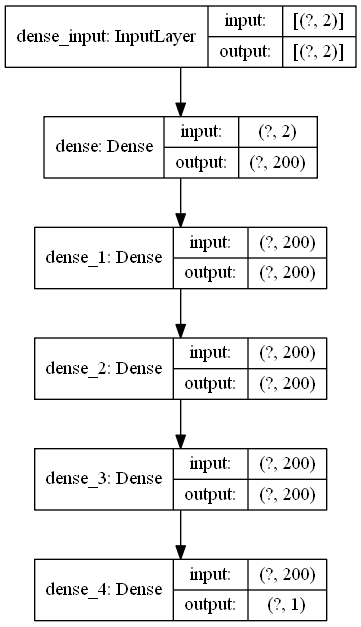

In [6]:
# visualize model
tf.keras.utils.plot_model(model, to_file='model1.png', show_shapes=True)

In [7]:
# REPEAT ABOVE, but now train with one example at a time...

# assemble model for on-line training (one training example available at a time)
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(units=200,input_dim=np.size(x,1), activation='relu')) # try adding a kernel initializer (uniform?) to each layer
#model.add(tf.keras.layers.Dense(units=1))
#model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
#model.summary()

In [8]:
# perform a prediction before any training
#model.predict(np.reshape(np.array([11,13]),(1,2)))

In [9]:
# train model sequentially (this does't seem like a good idea...)
# goes so much slower in tensorflow 2.0
#for i in range(0,np.size(x,0)):
#    model.fit(np.reshape(x[i],(1,2)),np.array([y[i]]),epochs=1,verbose=0)

In [10]:
# perform a prediction
#print(model.predict(np.reshape(np.array([11,13]),(1,2))))

In [11]:
#np.reshape(np.array([11,13]),(1,2))

In [12]:
# visualize model
#tf.keras.utils.plot_model(model, to_file='model2.png', show_shapes=True)